In [ ]:
import keras
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

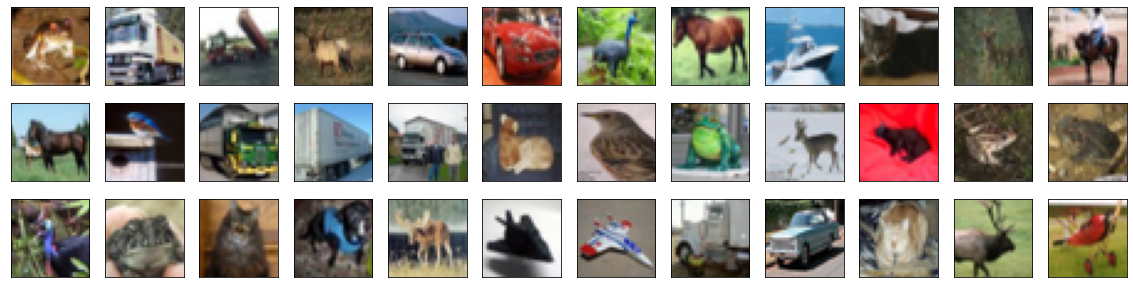

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,5))
for i in range(36):
  ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]))






# Rescale the data

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]


# one hot encoding for labels

In [ ]:
from keras.utils import np_utils
from tensorflow import keras
#num_classes=len(np.unique(y_train))
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# train , test ,validation

In [ ]:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

In [ ]:
print("x_train shape",x_train.shape)
print('train samples',x_train.shape[0])
print("test samples",x_test.shape[0])
print('valid sample',x_valid.shape[0])


x_train shape (45000, 32, 32, 3)
train samples 45000
test samples 10000
valid sample 5000


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D ,Flatten , Dense,Dropout

In [ ]:
# initialize model
model=Sequential()
# first conv layer
model.add(Conv2D(filters=16 , kernel_size=2 ,padding='same' ,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
# second conv layer
model.add(Conv2D(filters=32 , kernel_size=2 ,padding='same' ,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
# third conv layer
model.add(Conv2D(filters=64 , kernel_size=2 ,padding='same' ,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
#dropout layer
model.add(Dropout(0.3))
# flatten
model.add(Flatten())
# ANN
# hidden layer
model.add(Dense(500,activation='relu'))
# Dropout layer
model.add(Dropout(0.4))
# output layer
model.add(Dense(10,activation='softmax'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
#train the model
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=3,save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_valid,y_valid),callbacks=[checkpointer],verbose=3,shuffle=True)

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.43807, saving model to model.weights.best.hdf5
Epoch 2/5

Epoch 2: val_loss improved from 1.43807 to 1.10889, saving model to model.weights.best.hdf5
Epoch 3/5

Epoch 3: val_loss improved from 1.10889 to 0.98928, saving model to model.weights.best.hdf5
Epoch 4/5

Epoch 4: val_loss improved from 0.98928 to 0.94443, saving model to model.weights.best.hdf5
Epoch 5/5

Epoch 5: val_loss did not improve from 0.94443


In [ ]:
# predict
y_hat=model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
accuracy=100*score[1]
print("accuracy",accuracy)

accuracy 62.92999982833862


In [ ]:
score


[1.070076584815979, 0.6292999982833862]

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

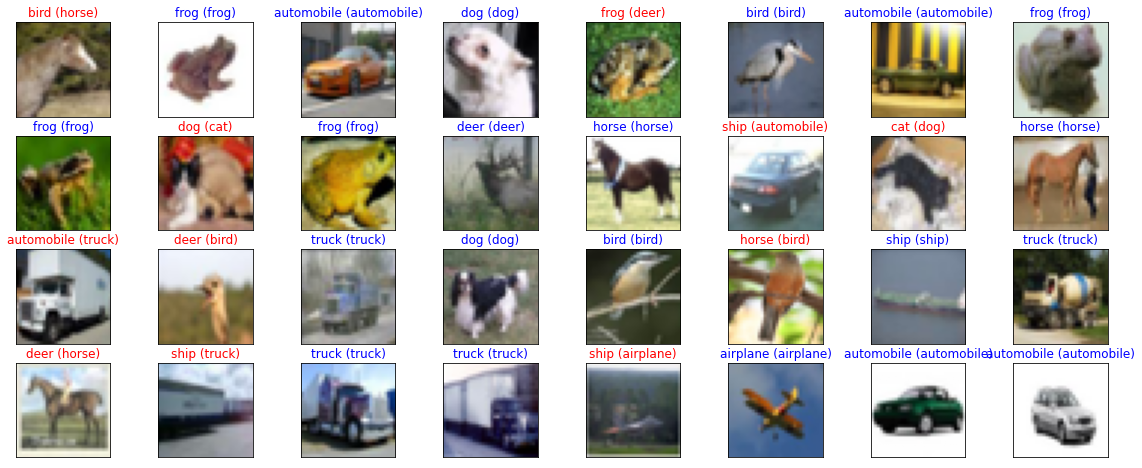

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [ ]:
import tensorflow as tf
img=keras.preprocessing.image.load_img("/content/car.jpg",target_size=(32,32,3))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)
predictions=model.predict(img_array)
score=predictions[0]
score



1/1 [==============================] - 0s 16ms/step


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
cifar10_labels[np.argmax(score)]

'automobile'

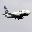

In [ ]:
img

In [ ]:
img_array.shape

(32, 32, 3)

In [ ]:
img_array.shape

TensorShape([1, 32, 32, 3])